$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [26]:
import numpy as np
import matplotlib.pyplot as plt

$\color{yellow}{\text{Zadanie 1}}$

```Wczytanie danych```

In [27]:
years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])

(a) ```Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vandermonde’a.```

In [28]:
V = np.vander(years, increasing=True)
V_1900 = np.vander(years-1900, increasing=True)
V_1940 = np.vander(years-1940, increasing=True)
V_1940_div = np.vander((years-1940)/40, increasing=True)

b) ```Oblicz współczynnik uwarunkowania każdej z powyższch macierzy, używając funkcji numpy.linalg.cond.```

In [42]:
V_cond = np.linalg.cond(V)
V_shifted_1900_cond = np.linalg.cond(V_1900)
V_shifted_1940_cond = np.linalg.cond(V_1940)
V_shifted_1940_div_cond = np.linalg.cond(V_1940_div)

conds = {
    "V": V_cond,
    "V_1900": V_shifted_1900_cond,
    "V_1940": V_shifted_1940_cond,
    "V_1940_div": V_shifted_1940_div_cond
}

matrix_name, min_cond = min(conds.items(), key=lambda x: x[1])

print(f"Najlepiej uwarunkowaną macierzą jest {matrix_name} wynosi on {min_cond:.2f}.")

Najlepiej uwarunkowaną macierzą jest V_1940_div wynosi on 1605.44.


c) ```Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczynniki wielomianu interpolacyjnego dla danych z zadania.```

In [30]:
coef = np.linalg.solve(V_1940_div, population)

c') ```Narysuj wielomian interpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale [1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresie umieść także węzły interpolacji.```

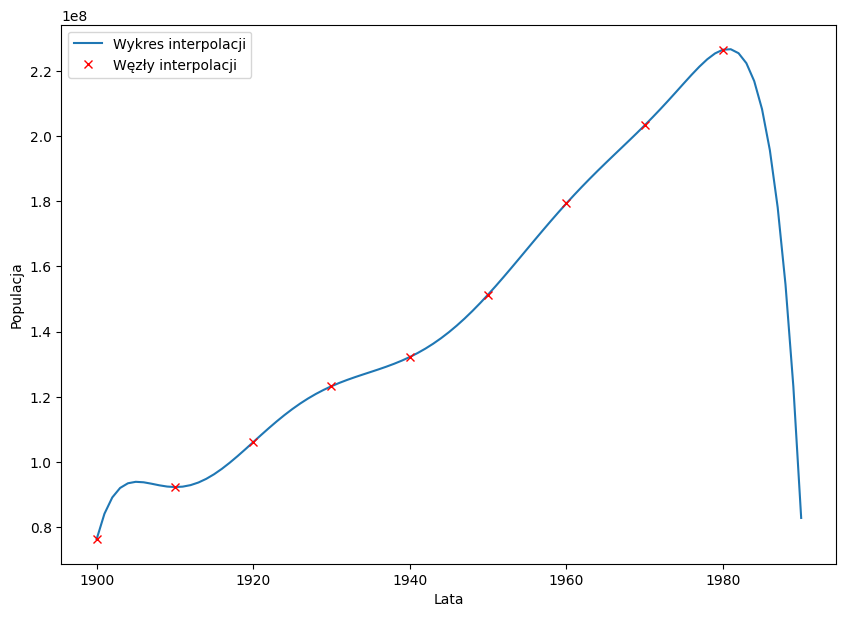

In [41]:
def horner(x, coef):
    x = (x - 1940) / 40 # skalowanie argumentu
    n = len(coef)
    result = coef[n - 1]
    for i in range(n - 2, -1, -1):
        result = result * x + coef[i]
    return result

x_values = np.arange(1900, 1991, 1)
y_values = population

plt.figure(figsize=(10, 7))
plt.plot(x_values, horner(x_values, coef), label = "Wykres interpolacji")
plt.plot(years, population, 'rx', label = "Węzły interpolacji")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.legend()
plt.show() 

d) ```Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartoscią dla roku 1990, wynoszącą 248 709 873. Ile wynosi bład względny ekstrapolacji dla roku 1990?```

In [45]:
empiric_value = 248709873
estimated_value = horner(1990, coef)

diff = abs(empiric_value - estimated_value)
relative_error = diff / empiric_value * 100

print(f"Interpolowana wartosc wynosi: {int(estimated_value)}. Rozni sie ona od rzeczywistej o {int(diff)}, oznacza to blad wzgledny na poziomie {relative_error:.2f}%.")

Interpolowana wartosc wynosi: 82749141. Rozni sie ona od rzeczywistej o 165960731, oznacza to blad wzgledny na poziomie 66.73%.


e) ```Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów interpolacji podanych w zadaniu. Oblicz wartości wielomianu w odstępach jednorocznych.```

In [44]:
points = np.array(list(zip(years, population)))

def calculate_lagrange(x, points):
    res = 0
    n = len(points)
    for i, (x_i, y_i) in enumerate(points):
        l_i = 1

        for j in range(n):
            if j != i:
                x_j, _ = points[j]
                l_i *= (x - x_j) / (x_i - x_j)
        res += y_i * l_i
    return res

lagrange_polynomial = np.array(calculate_lagrange(x_values, points))

Ala ma kota


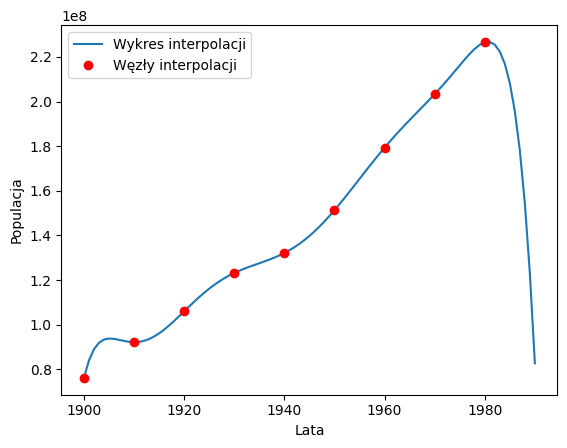

In [34]:

plt.plot(x_values, lagrange_polynomial, label = "Wykres interpolacji")
plt.plot(years, population, 'ro', label = "Węzły interpolacji")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.legend()

plt.show()

f) ```Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych węzłów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.``` 

In [35]:
def newton_diff(points): # Obliczanie ilorazow roznicowych
    n = len(points)
    diff = np.zeros((n, n))
    for i in range(n):
        diff[i][0] = points[i][1]

    for j in range(1, n):
        for i in range(n - j):
            diff[i][j] = (diff[i + 1][j - 1] - diff[i][j - 1]) / (points[i + j][0] - points[i][0])

    return diff[0]

def calculate_newton(x, points): # Obliczanie wartosci wielomianu
    coef = newton_diff(points)
    n = len(points)
    res = coef[n - 1]

    for i in range(n - 2, -1, -1):
        res = res * (x - points[i][0]) + coef[i]

    return res

newton_polynomial = np.array(calculate_newton(x_values, points))

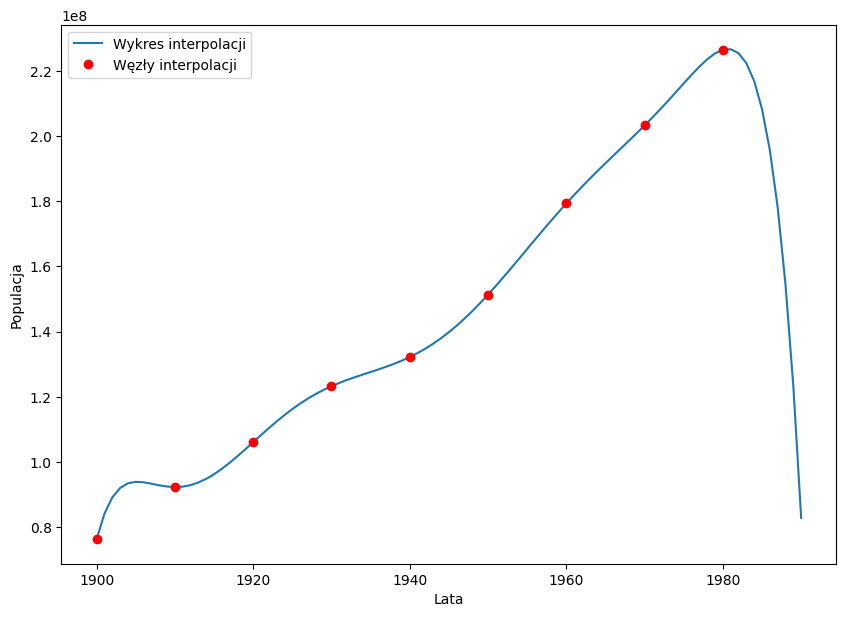

In [36]:
plt.figure(figsize=(10, 7))
plt.plot(x_values, newton_polynomial, label = "Wykres interpolacji")
plt.plot(years, population, 'ro', label = "Węzły interpolacji")
plt.xlabel("Lata")
plt.ylabel("Populacja")
plt.legend()

plt.show()

g) ```Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takich danych wyznacz wielomian interpolacyjny ósmego stopnia, używając najlepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współczynniki ze współczynnikami obliczonymi w podpunkcie (c). Wyjaśnij otrzymany wynik.```

In [37]:
rounded_population = np.round(population / (10**6)) * (10**6)
coef_rounded = np.linalg.solve(V_1940_div, rounded_population)

relative_errors = np.array(abs(coef - coef_rounded) / abs(coef) * 100) 

print(f"Najwiekszy blad wzgledny wynosi {relative_errors.max():.2f}%, najmniejszy {relative_errors.min():.2f}%, a średni {relative_errors.mean():.2f}%.")

Najwiekszy blad wzgledny wynosi 6.66%, najmniejszy 0.12%, a średni 2.62%.


```Ekstrapolacja dla roku 1990 dla współczynników pozyskanych z zaokrąglonych danych wejściowych.```

In [38]:
estimated_value = horner(1990, coef_rounded)

diff = abs(empiric_value - estimated_value)
relative_error = diff / empiric_value * 100

print(f"Interpolowana wartosc wynosi: {int(estimated_value)}. Rozni sie ona od rzeczywistej o {int(diff)}, oznacza to blad wzgledny na poziomie {relative_error:.2f}%.")

Interpolowana wartosc wynosi: 109000000. Rozni sie ona od rzeczywistej o 139709872, oznacza to blad wzgledny na poziomie 56.17%.
